### biến đổi fourier 
#### khái niệm : 
-   Fourier Transform (FT) phân tách một tín hiệu bất kỳ thành các hàm sin & cos.

    Nó giúp ta chuyển ảnh từ miền không gian (spatial domain) sang miền tần số (frequency domain).

    📘 Ví dụ: Một bức ảnh phức tạp = tổng các sóng sin/cos với tần số khác nhau.
#### công thức : 
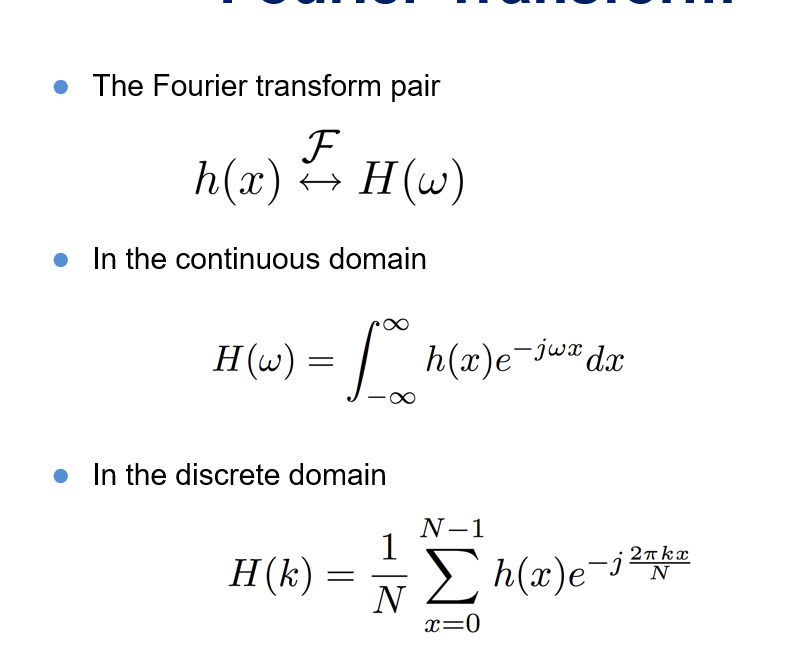    


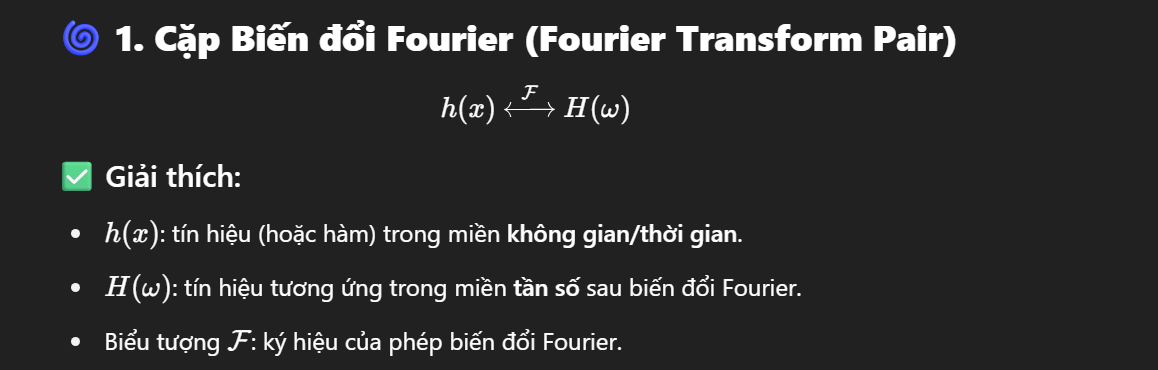
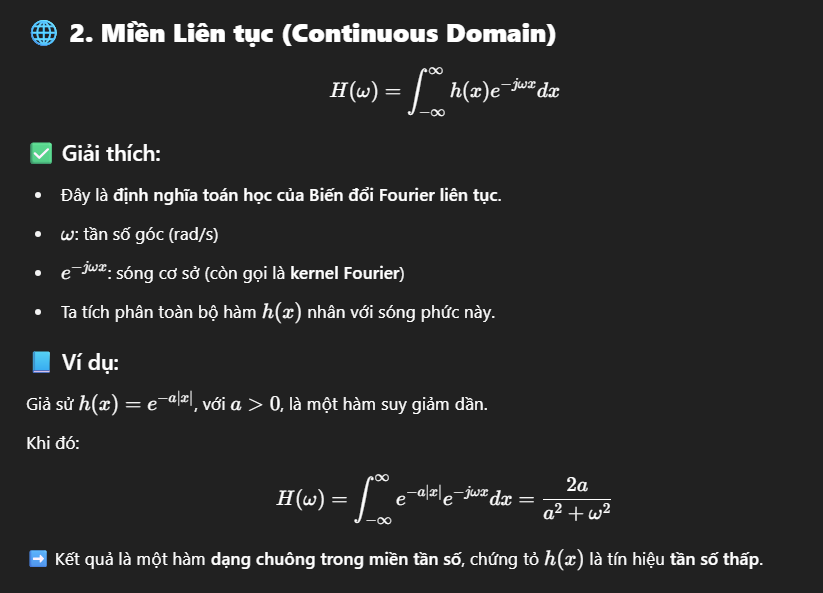
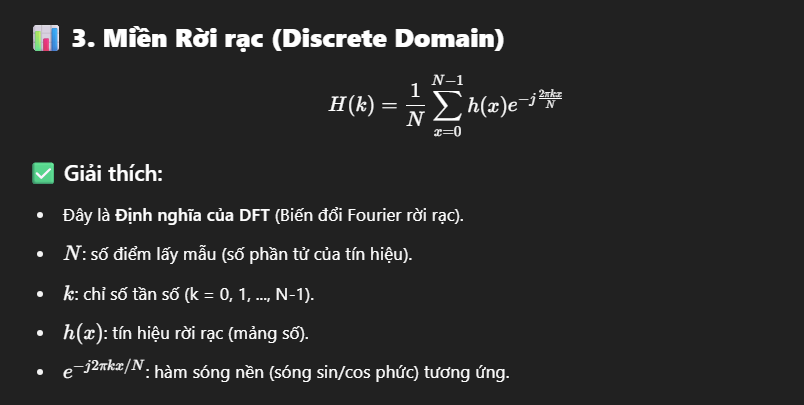

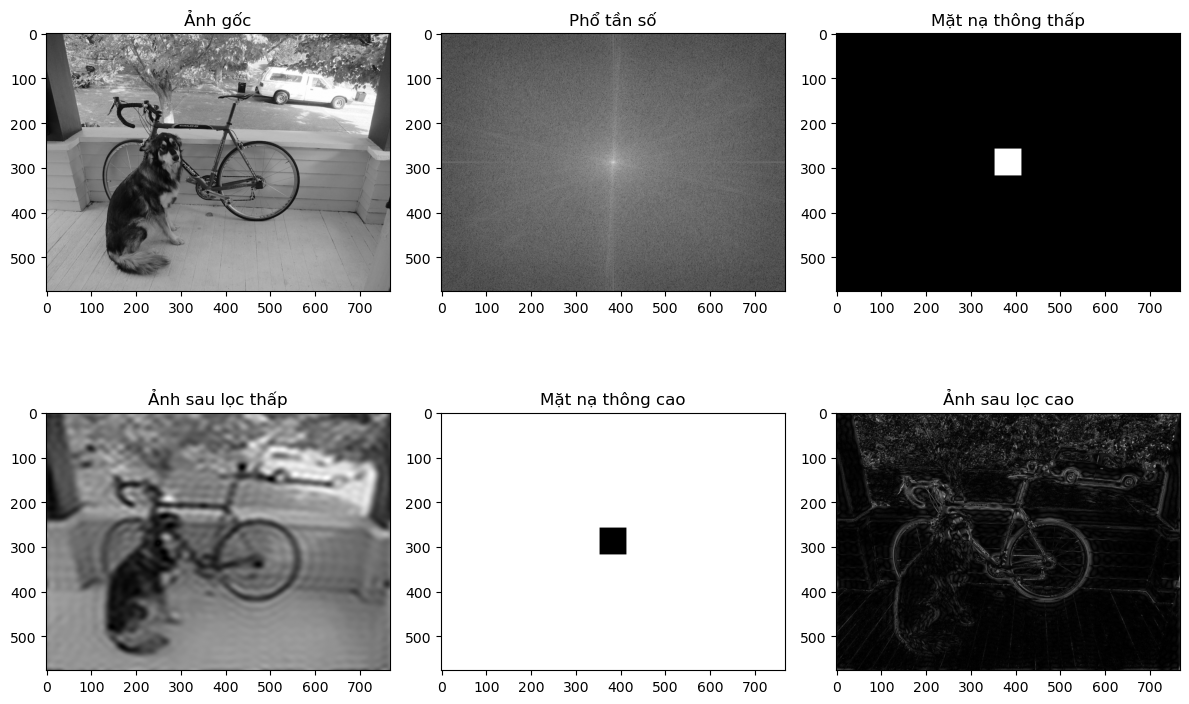

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('D:/SUM25/CPV/code_in_class/images/dog.jpg')
if img is None:
    raise FileNotFoundError("Ảnh không tồn tại!")

if img.ndim == 3:
    img = img[:, :, 0] * 0.299 + img[:, :, 1] * 0.587 + img[:, :, 2] * 0.114

rows, cols = img.shape

# 1. Thực hiện biến đổi Fourier 2D
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)  # Dịch tâm về giữa

# 2. Tính phổ biên độ (magnitude spectrum)
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)

# 3. Thiết kế bộ lọc thông thấp (Low-pass filter)
crow, ccol = rows // 2, cols // 2
low_pass = np.zeros((rows, cols), np.uint8)
r = 30  # bán kính vùng lọc
low_pass[crow-r:crow+r, ccol-r:ccol+r] = 1

# Áp dụng Low-pass filter
fshift_low = fshift * low_pass
f_ishift_low = np.fft.ifftshift(fshift_low)
img_low_pass = np.fft.ifft2(f_ishift_low)
img_low_pass = np.abs(img_low_pass)

# 4. Thiết kế bộ lọc thông cao (High-pass filter)
high_pass = 1 - low_pass
fshift_high = fshift * high_pass
f_ishift_high = np.fft.ifftshift(fshift_high)
img_high_pass = np.fft.ifft2(f_ishift_high)
img_high_pass = np.abs(img_high_pass)

# 5. Hiển thị kết quả
plt.figure(figsize=(12, 8))
plt.subplot(231), plt.imshow(img, cmap='gray'), plt.title('Ảnh gốc')
plt.subplot(232), plt.imshow(magnitude_spectrum, cmap='gray'), plt.title('Phổ tần số')
plt.subplot(233), plt.imshow(low_pass*255, cmap='gray'), plt.title('Mặt nạ thông thấp')
plt.subplot(234), plt.imshow(img_low_pass, cmap='gray'), plt.title('Ảnh sau lọc thấp')
plt.subplot(235), plt.imshow(high_pass*255, cmap='gray'), plt.title('Mặt nạ thông cao')
plt.subplot(236), plt.imshow(img_high_pass, cmap='gray'), plt.title('Ảnh sau lọc cao')
plt.tight_layout()
plt.show()
